In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
%matplotlib inline
pn.extension("plotly")
from alpha_vantage.timeseries import TimeSeries
from pandas_datareader import data
import pandas_datareader as pdr

## ENTERTAINMENT

In [3]:
# etf = xly (Consumer Discretionary Select Sector SPDR Fund)
# amc = AMC Theatres
# cnk = Cinemark Theatres
# msgs = Madison Square Garden Sports Corp
# seas = Seaworld Entertainment Inc
# wwe = World Wrestling Entertainment Inc

from datetime import datetime
end_date=datetime.now().strftime('%Y-%m-%d')
ent_stocks = data.DataReader(['amc', 'cnk', 'msgs','seas', 'wwe', 'xly'],
                       start='2019-08-16',
                       end=end_date,
                       data_source='yahoo') ['Adj Close']

In [4]:
ent_stocks.dropna(inplace=True)
ent_stocks.isnull().sum()

Symbols
amc     0
cnk     0
msgs    0
seas    0
wwe     0
xly     0
dtype: int64

In [5]:
ent_stock_df_plot = ent_stocks.hvplot(title="Entertainment Industry Closing Price")
ent_stock_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [6]:
# ENTERTAINMENT DAILY RETURNS PLOT

In [7]:
ent_stocks_pct_change=ent_stocks.pct_change()
ent_stocks_pct_change=ent_stocks.pct_change()
pd.DataFrame(ent_stocks_pct_change)
ent_stocks_daily_returns_df_plot = ent_stocks_pct_change.hvplot(title="Entertainment Industry Pct.Change")
ent_stocks_daily_returns_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [8]:
# ENTERTAINMENT CUMULATIVE RETURNS

In [9]:
ent_cumulative_returns=(1+ent_stocks_pct_change).cumprod()-1
ent_cum_returns_df_plot = ent_cumulative_returns.hvplot(title="Entertainment Cumulative Returns")
ent_cum_returns_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [10]:
# ENTERTAINMENT SHARPE

In [11]:
ent_sharpe_ratios=(ent_stocks_pct_change.mean()*252)/(ent_stocks_pct_change.std()*np.sqrt(252))
ent_sharpe_ratios.sort_values()

Symbols
wwe    -0.449993
msgs   -0.295158
cnk    -0.293692
seas   -0.081293
amc    -0.040100
xly     0.953135
dtype: float64

In [12]:
ent_sharpe_ratios_plot = ent_sharpe_ratios.hvplot.bar()
ent_sharpe_ratios_plot

:Bars   [Symbols]   (0)

In [13]:
# ENTERTAINMENT RISK

In [14]:
# VOLITION
ent_daily_std=ent_stocks_pct_change.std()
print(ent_daily_std)

Symbols
amc     0.071375
cnk     0.073238
msgs    0.027321
seas    0.056299
wwe     0.035452
xly     0.020450
dtype: float64


In [15]:
# RISKIEST ENTERTAINMENT PORTFOLIOS
risky_ent=ent_daily_std[ent_daily_std>ent_daily_std["xly"]]
print(risky_ent)

Symbols
amc     0.071375
cnk     0.073238
msgs    0.027321
seas    0.056299
wwe     0.035452
dtype: float64


In [16]:
# ANNUAL STANDARD DEVIATION (252 DAYS) -- ENTERTAINMENT
annualized_ent_std=ent_daily_std*np.sqrt(252)
annualized_ent_std

Symbols
amc     1.133049
cnk     1.162621
msgs    0.433712
seas    0.893715
wwe     0.562780
xly     0.324628
dtype: float64

In [17]:
# 30 DAY MOVING AVERAGE -- ENTERTAINMENT

In [18]:
ent_rolling_window = ent_stocks_pct_change.rolling(window=30).mean().hvplot()
ent_rolling_window

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
# ENTERTAINMENT CORRELATION

Symbols,amc,cnk,msgs,seas,wwe,xly
Symbols,,,,,,
amc,1.000000,0.645722,0.403978,0.523475,0.312534,0.503840
cnk,0.645722,1.000000,0.419618,0.596737,0.308630,0.435732
msgs,0.403978,0.419618,1.000000,0.598096,0.375001,0.687446
seas,0.523475,0.596737,0.598096,1.000000,0.276566,0.611843
wwe,0.312534,0.308630,0.375001,0.276566,1.000000,0.481607
xly,0.503840,0.435732,0.687446,0.611843,0.481607,1.000000


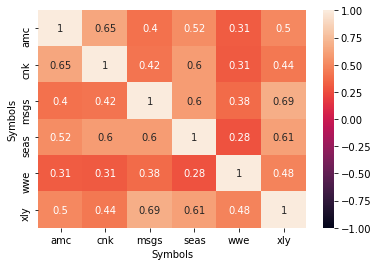

In [20]:
import seaborn as sb
ent_correlation=ent_stocks_pct_change.corr()
ent_heatmap = sb.heatmap(ent_correlation,vmin=-1,vmax=1,annot=True,)
ent_correlation

## RESTAURANTS

In [21]:
# mcd = McDonald's Corporation
# sbux = Starbucks Corporation
# yum = Yum Brands Inc
# txrh = Texas Roadhouse Inc
# cbrl = Cracker Barrel Old Country Store

from datetime import datetime
end_date=datetime.now().strftime('%Y-%m-%d')
res_stocks = data.DataReader(['mcd', 'sbux', 'yum','txrh', 'cbrl', 'xly'],
                       start='2019-08-01',
                       end=end_date,
                       data_source='yahoo') ['Adj Close']

In [22]:
res_stocks.dropna(inplace=True)
res_stocks.isnull().sum()

Symbols
mcd     0
sbux    0
yum     0
txrh    0
cbrl    0
xly     0
dtype: int64

In [23]:
res_stock_df_plot = res_stocks.hvplot(title="Restaurant Industry Closing Price")
res_stock_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [24]:
# RESTAURANT DAILY RETURNS

In [25]:
res_stocks_pct_change=res_stocks.pct_change()
res_stocks_pct_change=res_stocks.pct_change()
pd.DataFrame(res_stocks_pct_change)
res_stock_daily_returns_plot = res_stocks_pct_change.hvplot(title="Restaurant Industry Pct.Change")
res_stock_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [26]:
# RESTAURANT CUMULATIVE RETURNS

In [27]:
res_cumulative_returns=(1+res_stocks_pct_change).cumprod()-1
res_cum_returns_df_plot = res_cumulative_returns.hvplot(title="Restaurant Cumulative Returns")
res_cum_returns_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [28]:
# RESTAURANT SHARPE

In [29]:
res_sharpe_ratios=(res_stocks_pct_change.mean()*252)/(res_stocks_pct_change.std()*np.sqrt(252))
res_sharpe_ratios.sort_values()

Symbols
yum    -0.180975
sbux   -0.150974
cbrl   -0.061481
mcd     0.269817
txrh    0.514980
xly     0.845327
dtype: float64

In [30]:
res_sharpe_ratios_plot = res_sharpe_ratios.hvplot.bar()
res_sharpe_ratios_plot

:Bars   [Symbols]   (0)

In [31]:
# RESTAURANT RISK

In [32]:
# STD
res_daily_std=res_stocks_pct_change.std()
print(res_daily_std)

Symbols
mcd     0.024792
sbux    0.027152
yum     0.026698
txrh    0.041764
cbrl    0.044402
xly     0.020318
dtype: float64


In [33]:
# RISKIEST RESTAURANT PORTFOLIOS
risky_res=res_daily_std[res_daily_std>res_daily_std["xly"]]
print(risky_res)

Symbols
mcd     0.024792
sbux    0.027152
yum     0.026698
txrh    0.041764
cbrl    0.044402
dtype: float64


In [34]:
# ANNUAL STANDARD DEVIATION (252 DAYS) -- RESTAURANTS
annualized_res_std=res_daily_std*np.sqrt(252)
annualized_res_std

Symbols
mcd     0.393564
sbux    0.431031
yum     0.423821
txrh    0.662988
cbrl    0.704856
xly     0.322535
dtype: float64

In [35]:
# 30 DAY MOVING AVERAGE -- RESTAURANTS

In [36]:
res_rolling_window = res_stocks_pct_change.rolling(window=30).mean().hvplot(title= 'Restaurant Sector 30 Day Moving Average')
res_rolling_window

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [37]:
# RESTAURANT CORRELATION

Symbols,mcd,sbux,yum,txrh,cbrl,xly
Symbols,,,,,,
mcd,1.000000,0.840429,0.802754,0.622371,0.633696,0.833998
sbux,0.840429,1.000000,0.757618,0.626667,0.658448,0.873226
yum,0.802754,0.757618,1.000000,0.636954,0.630328,0.737704
txrh,0.622371,0.626667,0.636954,1.000000,0.755054,0.647951
cbrl,0.633696,0.658448,0.630328,0.755054,1.000000,0.669644
xly,0.833998,0.873226,0.737704,0.647951,0.669644,1.000000


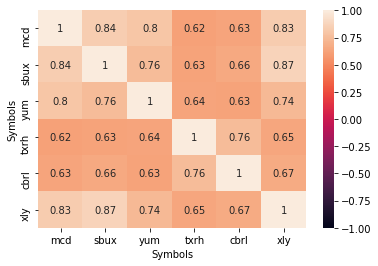

In [38]:
res_correlation=res_stocks_pct_change.corr()
res_heatmap = sb.heatmap(res_correlation,vmin=-1,vmax=1,annot=True,)
res_correlation

# HOTELS

In [39]:
# mar = Marriott International Inc
# hlt = Hilton Worldwide Holdings Inc
# rcl = Royal Caribbean Group 
# h = Hyatt Hotels Corp
# chh = Choice Hotels International Inc

from datetime import datetime
end_date=datetime.now().strftime('%Y-%m-%d')
hot_stocks = data.DataReader(['mar', 'hlt', 'rcl','h', 'chh','xly'],
                       start='2019-08-01',
                       end=end_date,
                       data_source='yahoo') ['Adj Close']



In [40]:
hot_stocks.dropna(inplace=True)
hot_stocks.isnull().sum()

Symbols
mar    0
hlt    0
rcl    0
h      0
chh    0
xly    0
dtype: int64

In [41]:
hot_stocks_df_plot = hot_stocks.hvplot(title="Hotel/Resorts/Cruises Industry Closing Price")
hot_stocks_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [42]:
# HOTEL DAILY RETURNS

In [43]:
hot_stocks_pct_change=hot_stocks.pct_change()
hot_stocks_pct_change=hot_stocks.pct_change()
pd.DataFrame(hot_stocks_pct_change)
hot_stocks_daily_returns_plot = hot_stocks_pct_change.hvplot(title="Hotel Industry Pct.Change")
hot_stocks_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [44]:
# HOTEL CUMULATIVE RETURNS

In [45]:
hot_cumulative_returns=(1+hot_stocks_pct_change).cumprod()-1
hot_cum_returns_df_plot = hot_cumulative_returns.hvplot(title = "Hotel Sector Cumulative Returns")
hot_cum_returns_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [46]:
# HOTEL SHARPE

In [47]:
hot_sharpe_ratios=(hot_stocks_pct_change.mean()*252)/(hot_stocks_pct_change.std()*np.sqrt(252))
hot_sharpe_ratios.sort_values()

Symbols
mar   -0.202300
h     -0.154391
rcl    0.023642
hlt    0.088667
chh    0.506302
xly    0.845327
dtype: float64

In [48]:
hot_sharpe_ratio_plot = hot_sharpe_ratios.hvplot.bar()
hot_sharpe_ratio_plot

:Bars   [Symbols]   (0)

In [49]:
# HOTEL RISK

In [50]:
# STD
hot_daily_std=hot_stocks_pct_change.std()
print(hot_daily_std)

Symbols
mar    0.038218
hlt    0.029092
rcl    0.064786
h      0.036883
chh    0.030882
xly    0.020318
dtype: float64


In [51]:
# RISKIEST HOTEL PORTFOLIOS
risky_hot=hot_daily_std[hot_daily_std>hot_daily_std["xly"]]
print(risky_hot)

Symbols
mar    0.038218
hlt    0.029092
rcl    0.064786
h      0.036883
chh    0.030882
dtype: float64


In [52]:
# ANNUAL STANDARD DEVIATION (252 DAYS) -- HOTELS
annualized_hot_std=hot_daily_std*np.sqrt(252)
annualized_hot_std

Symbols
mar    0.606695
hlt    0.461824
rcl    1.028451
h      0.585502
chh    0.490242
xly    0.322535
dtype: float64

In [53]:
# 30 DAY MOVING AVERAGE -- HOTELS

In [54]:
hot_rolling_window = hot_stocks_pct_change.rolling(window=30).mean().hvplot(title= "Hotel Sector 30 Day Moving Average")
hot_rolling_window

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [55]:
# HOTEL CORRELATION

Symbols,mar,hlt,rcl,h,chh,xly
Symbols,,,,,,
mar,1.000000,0.892139,0.746783,0.878205,0.836432,0.647121
hlt,0.892139,1.000000,0.751844,0.865776,0.810661,0.714921
rcl,0.746783,0.751844,1.000000,0.775317,0.726342,0.658409
h,0.878205,0.865776,0.775317,1.000000,0.795359,0.651678
chh,0.836432,0.810661,0.726342,0.795359,1.000000,0.723707
xly,0.647121,0.714921,0.658409,0.651678,0.723707,1.000000


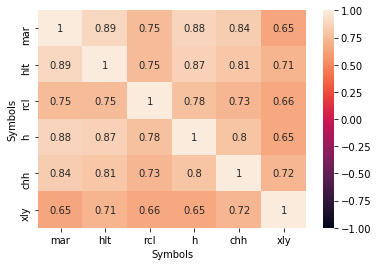

In [56]:
hot_correlation=hot_stocks_pct_change.corr()
hot_heatmap = sb.heatmap(hot_correlation,vmin=-1,vmax=1,annot=True,)
hot_correlation

## MONTE CARLO SIMULATIONS -- ENTERTAINMENT

In [57]:
'amc', 'cnk', 'msgs','seas', 'wwe', 'xly'

('amc', 'cnk', 'msgs', 'seas', 'wwe', 'xly')

In [58]:
# CALCULATE ROI FOR ENTERTAINMENT STOCKS
avg_daily_return_amc = ent_stocks_pct_change.mean()['amc']
avg_daily_return_cnk = ent_stocks_pct_change.mean()['cnk']
avg_daily_return_msgs = ent_stocks_pct_change.mean()['msgs']
avg_daily_return_seas = ent_stocks_pct_change.mean()['seas']
avg_daily_return_wwe = ent_stocks_pct_change.mean()['wwe']
avg_daily_return_xly = ent_stocks_pct_change.mean()['xly']

# DISPLAY SAMPLE DATA
print(avg_daily_return_amc, avg_daily_return_cnk, avg_daily_return_msgs, 
      avg_daily_return_seas, avg_daily_return_wwe, avg_daily_return_xly)

-0.00018029900531269392 -0.0013549680394636548 -0.0005079901762133339 -0.00028830493852969295 -0.0010049488080617365 0.0012278356846099122


In [59]:
# CALCULATE DAILY VOLATILITY

std_dev_daily_return_amc = ent_stocks_pct_change.std()['amc']
std_dev_daily_return_cnk = ent_stocks_pct_change.std()['cnk']
std_dev_daily_return_msgs = ent_stocks_pct_change.std()['msgs']
std_dev_daily_return_seas = ent_stocks_pct_change.std()['seas']
std_dev_daily_return_wwe = ent_stocks_pct_change.std()['wwe']
std_dev_daily_return_xly = ent_stocks_pct_change.std()['xly']

print(std_dev_daily_return_amc, std_dev_daily_return_cnk, std_dev_daily_return_msgs,
      std_dev_daily_return_seas, std_dev_daily_return_wwe, std_dev_daily_return_xly)

0.07137535315819572 0.0732382145842049 0.027321286689414494 0.05629872574293758 0.035451799879909866 0.020449653499117454


In [60]:
# SAVE THE LAST DAY'S CLOSING PRICE

amc_last_price = ent_stocks['amc'][-1]
cnk_last_price = ent_stocks['cnk'][-1]
msgs_last_price = ent_stocks['msgs'][-1]
seas_last_price = ent_stocks['seas'][-1]
wwe_last_price = ent_stocks['wwe'][-1]
xly_last_price = ent_stocks['xly'][-1]

In [61]:
# SET MONTE CARLO PARAMETERS

number_simulations = 1000
number_records = 252
monte_carlo = pd.DataFrame()

# INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICE OF THE ENTERTAINMENT STOCKS

simulated_amc_prices = [amc_last_price]
simulated_cnk_prices = [cnk_last_price]
simulated_msgs_prices = [msgs_last_price]
simulated_seas_prices = [seas_last_price]
simulated_wwe_prices = [wwe_last_price]
simulated_xly_prices = [xly_last_price]

# INITIALIZE AN EMPTY DATAFRAME TO HOLD SIMULATED PRICES FOR EACH SIMULATION

ent_simulated_price_df = pd.DataFrame()
ent_portfolio_cumulative_returns = pd.DataFrame()

# RUN SIMULATION OF PROJECTED STOCK PRICES FOR THE NEXT TRADING YEAR, 500 TIMES

for n in range(number_simulations):
    
    # INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICES
    
    simulated_amc_prices = [amc_last_price]
    simulated_cnk_prices = [cnk_last_price]
    simulated_msgs_prices = [msgs_last_price]
    simulated_seas_prices = [seas_last_price]
    simulated_wwe_prices = [wwe_last_price]
    simulated_xly_prices = [xly_last_price]
        
    # SIMULATE RETURNS FOR 252 DAYS
    
    for i in range(number_records):
        
        # CALCULATE THE SIMULATED PRICE USING THE LAST PRICE WITHIN THE LIST
        
        simulated_amc_price = simulated_amc_prices[-1] * (1 + np.random.normal(avg_daily_return_amc, std_dev_daily_return_amc))
        simulated_cnk_price = simulated_cnk_prices[-1] * (1 + np.random.normal(avg_daily_return_cnk, std_dev_daily_return_cnk))
        simulated_msgs_price = simulated_msgs_prices[-1] * (1 + np.random.normal(avg_daily_return_msgs, std_dev_daily_return_msgs))
        simulated_seas_price = simulated_seas_prices[-1] * (1 + np.random.normal(avg_daily_return_seas, std_dev_daily_return_seas))
        simulated_wwe_price = simulated_wwe_prices[-1] * (1 + np.random.normal(avg_daily_return_wwe, std_dev_daily_return_wwe))
        simulated_xly_price = simulated_xly_prices[-1] * (1 + np.random.normal(avg_daily_return_xly, std_dev_daily_return_xly))
         
        # APPEND THE SIMULATED PRICE TO THE LIST
        
        simulated_amc_prices.append(simulated_amc_price)
        simulated_cnk_prices.append(simulated_cnk_price)
        simulated_msgs_prices.append(simulated_msgs_price) 
        simulated_seas_prices.append(simulated_seas_price) 
        simulated_wwe_prices.append(simulated_wwe_price) 
        simulated_xly_prices.append(simulated_xly_price) 
            
    # APPEND THE SIMULATED PRICES OF EACH SIMULATION TO DATAFRAME
    
    ent_simulated_price_df["AMC prices"] = pd.Series(simulated_amc_prices)
    ent_simulated_price_df["CNK prices"] = pd.Series(simulated_cnk_prices)
    ent_simulated_price_df["MSGS prices"] = pd.Series(simulated_msgs_prices)
    ent_simulated_price_df["SEAS prices"] = pd.Series(simulated_seas_prices)
    ent_simulated_price_df["WWE prices"] = pd.Series(simulated_wwe_prices)
    ent_simulated_price_df["XLY prices"] = pd.Series(simulated_xly_prices)
    
     # CALCULATE THE DAILY RETURNS OF SIMULATED PRICES
    
    ent_simulated_daily_returns = ent_simulated_price_df.pct_change()

In [62]:
ent_simulated_daily_returns_plot = ent_simulated_daily_returns.hvplot(title = "Entertainment Sector Simulated Daily Returns")
ent_simulated_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [63]:
ent_simulated_price_df_plot = ent_simulated_price_df.hvplot(title= "Entertainment Sector Simulated Price")
ent_simulated_price_df_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## MONTE CARLO SIMULATIONS -- RESTAURANT

In [64]:
'mcd', 'sbux', 'yum','txrh', 'cbrl', 'xly'

('mcd', 'sbux', 'yum', 'txrh', 'cbrl', 'xly')

In [65]:
# CALCULATE ROI FOR RESTAURANT STOCKS
avg_daily_return_mcd = res_stocks_pct_change.mean()['mcd']
avg_daily_return_sbux = res_stocks_pct_change.mean()['sbux']
avg_daily_return_yum = res_stocks_pct_change.mean()['yum']
avg_daily_return_txrh = res_stocks_pct_change.mean()['txrh']
avg_daily_return_cbrl = res_stocks_pct_change.mean()['cbrl']
avg_daily_return_xly = res_stocks_pct_change.mean()['xly']

# DISPLAY SAMPLE DATA
print(avg_daily_return_mcd, avg_daily_return_sbux, avg_daily_return_yum, 
      avg_daily_return_txrh, avg_daily_return_cbrl, avg_daily_return_xly)

0.0004213892865963636 -0.00025823268555110433 -0.000304368342684659 0.0013548645717214505 -0.00017196448930483792 0.0010819335808089977


In [66]:
# CALCULATE DAILY VOLATILITY

std_dev_daily_return_mcd = res_stocks_pct_change.std()['mcd']
std_dev_daily_return_sbux = res_stocks_pct_change.std()['sbux']
std_dev_daily_return_yum = res_stocks_pct_change.std()['yum']
std_dev_daily_return_txrh = res_stocks_pct_change.std()['txrh']
std_dev_daily_return_cbrl = res_stocks_pct_change.std()['cbrl']
std_dev_daily_return_xly = res_stocks_pct_change.std()['xly']

print(std_dev_daily_return_mcd, std_dev_daily_return_sbux, std_dev_daily_return_yum,
      std_dev_daily_return_txrh, std_dev_daily_return_cbrl, std_dev_daily_return_xly)

0.02479217845742498 0.027152393613289888 0.026698183269649966 0.04176433790865316 0.04440177499087193 0.020317782014386415


In [67]:
# SAVE THE LAST DAY'S CLOSING PRICE

mcd_last_price = res_stocks['mcd'][-1]
sbux_last_price = res_stocks['sbux'][-1]
yum_last_price = res_stocks['yum'][-1]
txrh_last_price = res_stocks['txrh'][-1]
cbrl_last_price = res_stocks['cbrl'][-1]
xly_last_price = res_stocks['xly'][-1]

In [68]:
# SET MONTE CARLO PARAMETERS

number_simulations = 1000
number_records = 252
monte_carlo2 = pd.DataFrame()

# INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICE OF THE RESTAURANT STOCKS

simulated_mcd_prices = [mcd_last_price]
simulated_sbux_prices = [sbux_last_price]
simulated_yum_prices = [yum_last_price]
simulated_txrh_prices = [txrh_last_price]
simulated_cbrl_prices = [cbrl_last_price]
simulated_xly_prices = [xly_last_price]

# INITIALIZE AN EMPTY DATAFRAME TO HOLD SIMULATED PRICES FOR EACH SIMULATION

res_simulated_price_df = pd.DataFrame()
res_portfolio_cumulative_returns = pd.DataFrame()

# RUN SIMULATION OF PROJECTED STOCK PRICES FOR THE NEXT TRADING YEAR, 500 TIMES

for n in range(number_simulations):
    
    # INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICES
    
    simulated_mcd_prices = [mcd_last_price]
    simulated_sbux_prices = [sbux_last_price]
    simulated_yum_prices = [yum_last_price]
    simulated_txrh_prices = [txrh_last_price]
    simulated_cbrl_prices = [cbrl_last_price]
    simulated_xly_prices = [xly_last_price]
        
    # SIMULATE RETURNS FOR 252 DAYS
    
    for i in range(number_records):
        
        # CALCULATE THE SIMULATED PRICE USING THE LAST PRICE WITHIN THE LIST
        
        simulated_mcd_price = simulated_mcd_prices[-1] * (1 + np.random.normal(avg_daily_return_mcd, std_dev_daily_return_mcd))
        simulated_sbux_price = simulated_sbux_prices[-1] * (1 + np.random.normal(avg_daily_return_sbux, std_dev_daily_return_sbux))
        simulated_yum_price = simulated_yum_prices[-1] * (1 + np.random.normal(avg_daily_return_yum, std_dev_daily_return_yum))
        simulated_txrh_price = simulated_txrh_prices[-1] * (1 + np.random.normal(avg_daily_return_txrh, std_dev_daily_return_txrh))
        simulated_cbrl_price = simulated_cbrl_prices[-1] * (1 + np.random.normal(avg_daily_return_cbrl, std_dev_daily_return_cbrl))
        simulated_xly_price = simulated_xly_prices[-1] * (1 + np.random.normal(avg_daily_return_xly, std_dev_daily_return_xly))
         
        # APPEND THE SIMULATED PRICE TO THE LIST
        
        simulated_mcd_prices.append(simulated_mcd_price)
        simulated_sbux_prices.append(simulated_sbux_price)
        simulated_yum_prices.append(simulated_yum_price) 
        simulated_txrh_prices.append(simulated_txrh_price) 
        simulated_cbrl_prices.append(simulated_cbrl_price) 
        simulated_xly_prices.append(simulated_xly_price) 
            
    # APPEND THE SIMULATED PRICES OF EACH SIMULATION TO DATAFRAME
    
    res_simulated_price_df["MCD prices"] = pd.Series(simulated_mcd_prices)
    res_simulated_price_df["SBUX prices"] = pd.Series(simulated_sbux_prices)
    res_simulated_price_df["YUM prices"] = pd.Series(simulated_yum_prices)
    res_simulated_price_df["TXRH prices"] = pd.Series(simulated_txrh_prices)
    res_simulated_price_df["CBRL prices"] = pd.Series(simulated_cbrl_prices)
    res_simulated_price_df["XLY prices"] = pd.Series(simulated_xly_prices)
    
     # CALCULATE THE DAILY RETURNS OF SIMULATED PRICES
    
    res_simulated_daily_returns = res_simulated_price_df.pct_change()

In [69]:
res_simulated_daily_returns_plot = res_simulated_daily_returns.hvplot(title= "Restaurant Sector Simulated Daily Returns")
res_simulated_daily_returns_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

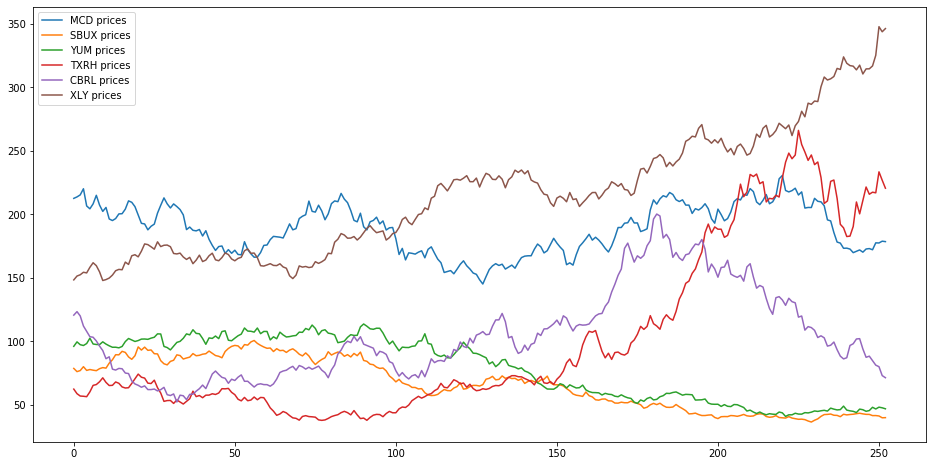

In [70]:
res_simulated_price_df_plot = res_simulated_price_df.plot(figsize=(16,8))
res_simulated_price_df_plot

## MONTE CARLO SIMULATIONS -- HOTELS

In [71]:
'mar', 'hlt', 'rcl','h', 'chh','xly'

('mar', 'hlt', 'rcl', 'h', 'chh', 'xly')

In [72]:
# CALCULATE ROI FOR RESTAURANT STOCKS
avg_daily_return_mar = hot_stocks_pct_change.mean()['mar']
avg_daily_return_hlt = hot_stocks_pct_change.mean()['hlt']
avg_daily_return_rcl = hot_stocks_pct_change.mean()['rcl']
avg_daily_return_h = hot_stocks_pct_change.mean()['h']
avg_daily_return_chh = hot_stocks_pct_change.mean()['chh']
avg_daily_return_xly = hot_stocks_pct_change.mean()['xly']

# DISPLAY SAMPLE DATA
print(avg_daily_return_mar, avg_daily_return_hlt, avg_daily_return_rcl, 
      avg_daily_return_h, avg_daily_return_chh, avg_daily_return_xly)

-0.00048704211383837376 0.0001624949471647386 9.64876505968293e-05 -0.0003587143275130329 0.000984963051714753 0.0010819335808089977


In [73]:
# CALCULATE DAILY VOLATILITY

std_dev_daily_return_mar = hot_stocks_pct_change.std()['mar']
std_dev_daily_return_hlt = hot_stocks_pct_change.std()['hlt']
std_dev_daily_return_rcl = hot_stocks_pct_change.std()['rcl']
std_dev_daily_return_h = hot_stocks_pct_change.std()['h']
std_dev_daily_return_chh = hot_stocks_pct_change.std()['chh']
std_dev_daily_return_xly = hot_stocks_pct_change.std()['xly']

print(std_dev_daily_return_mar, std_dev_daily_return_hlt, std_dev_daily_return_rcl,
      std_dev_daily_return_h, std_dev_daily_return_chh, std_dev_daily_return_xly)

0.03821818207012908 0.02909218722720203 0.06478629903283215 0.036883132983955576 0.030882356716667437 0.020317782014386415


In [74]:
# SAVE THE LAST DAY'S CLOSING PRICE

mar_last_price = hot_stocks['mar'][-1]
hlt_last_price = hot_stocks['hlt'][-1]
rcl_last_price = hot_stocks['rcl'][-1]
h_last_price = hot_stocks['h'][-1]
chh_last_price = hot_stocks['chh'][-1]
xly_last_price = hot_stocks['xly'][-1]

In [75]:
# SET MONTE CARLO PARAMETERS

number_simulations = 1000
number_records = 252
monte_carlo3 = pd.DataFrame()

# INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICE OF THE RESTAURANT STOCKS

simulated_mar_prices = [mar_last_price]
simulated_hlt_prices = [hlt_last_price]
simulated_rcl_prices = [rcl_last_price]
simulated_h_prices = [h_last_price]
simulated_chh_prices = [chh_last_price]
simulated_xly_prices = [xly_last_price]

# INITIALIZE AN EMPTY DATAFRAME TO HOLD SIMULATED PRICES FOR EACH SIMULATION

hot_simulated_price_df = pd.DataFrame()
hot_portfolio_cumulative_returns = pd.DataFrame()

# RUN SIMULATION OF PROJECTED STOCK PRICES FOR THE NEXT TRADING YEAR, 500 TIMES

for n in range(number_simulations):
    
    # INITIALIZE THE SIMULATED PRICES WITH THE LAST CLOSING PRICES
    
    simulated_mar_prices = [mar_last_price]
    simulated_hlt_prices = [hlt_last_price]
    simulated_rcl_prices = [rcl_last_price]
    simulated_h_prices = [h_last_price]
    simulated_chh_prices = [chh_last_price]
    simulated_xly_prices = [xly_last_price]
        
    # SIMULATE RETURNS FOR 252 DAYS
    
    for i in range(number_records):
        
        # CALCULATE THE SIMULATED PRICE USING THE LAST PRICE WITHIN THE LIST
        
        simulated_mar_price = simulated_mar_prices[-1] * (1 + np.random.normal(avg_daily_return_mar, std_dev_daily_return_mar))
        simulated_hlt_price = simulated_hlt_prices[-1] * (1 + np.random.normal(avg_daily_return_hlt, std_dev_daily_return_hlt))
        simulated_rcl_price = simulated_rcl_prices[-1] * (1 + np.random.normal(avg_daily_return_rcl, std_dev_daily_return_rcl))
        simulated_h_price = simulated_h_prices[-1] * (1 + np.random.normal(avg_daily_return_h, std_dev_daily_return_h))
        simulated_chh_price = simulated_chh_prices[-1] * (1 + np.random.normal(avg_daily_return_chh, std_dev_daily_return_chh))
        simulated_xly_price = simulated_xly_prices[-1] * (1 + np.random.normal(avg_daily_return_xly, std_dev_daily_return_xly))
         
        # APPEND THE SIMULATED PRICE TO THE LIST
        
        simulated_mar_prices.append(simulated_mar_price)
        simulated_hlt_prices.append(simulated_hlt_price)
        simulated_rcl_prices.append(simulated_rcl_price) 
        simulated_h_prices.append(simulated_h_price) 
        simulated_chh_prices.append(simulated_chh_price) 
        simulated_xly_prices.append(simulated_xly_price) 
            
    # APPEND THE SIMULATED PRICES OF EACH SIMULATION TO DATAFRAME
    
    hot_simulated_price_df["MAR prices"] = pd.Series(simulated_mar_prices)
    hot_simulated_price_df["HLT prices"] = pd.Series(simulated_hlt_prices)
    hot_simulated_price_df["RCL prices"] = pd.Series(simulated_yum_prices)
    hot_simulated_price_df["H prices"] = pd.Series(simulated_h_prices)
    hot_simulated_price_df["CHH prices"] = pd.Series(simulated_chh_prices)
    hot_simulated_price_df["XLY prices"] = pd.Series(simulated_xly_prices)
    
     # CALCULATE THE DAILY RETURNS OF SIMULATED PRICES
    
    hot_simulated_daily_returns = hot_simulated_price_df.pct_change()

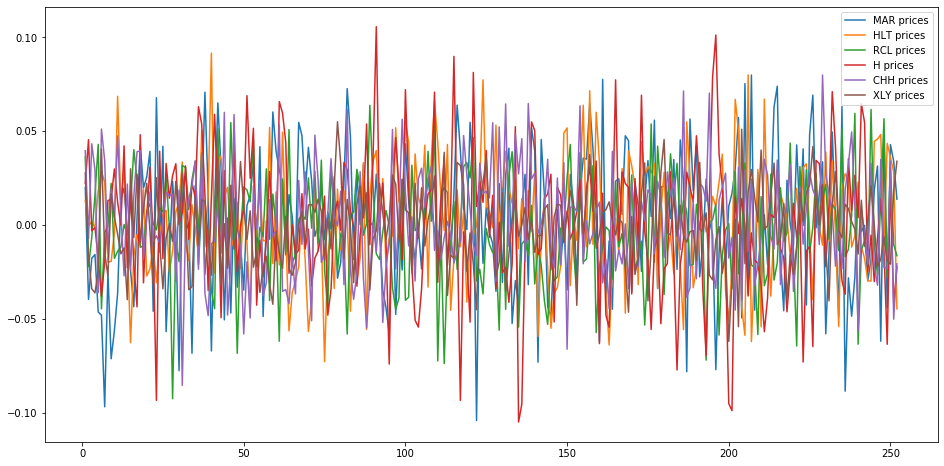

In [76]:
hot_simulated_daily_returns_plot = hot_simulated_daily_returns.plot(figsize=(16,8))

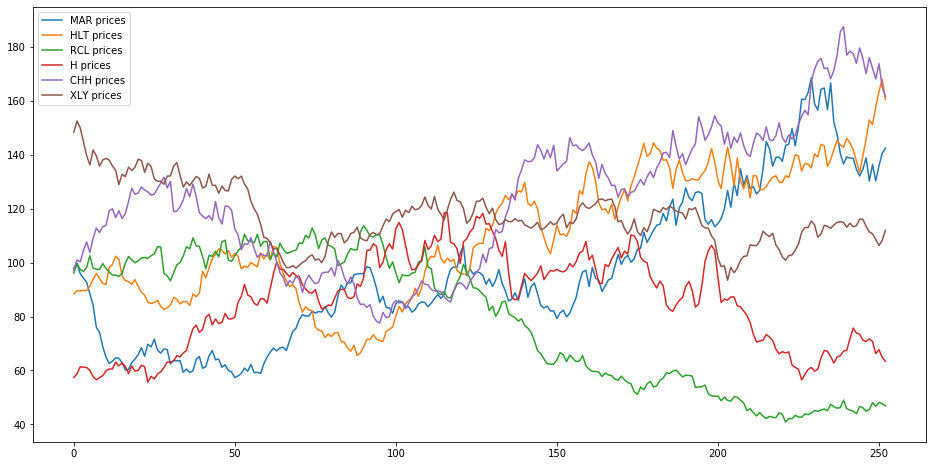

In [77]:
hot_simulated_price_df_plot = hot_simulated_price_df.plot(figsize=(16,8))

In [78]:
%whos

Variable                           Type           Data/Info
-----------------------------------------------------------
Path                               type           <class 'pathlib.Path'>
TimeSeries                         type           <class 'alpha_vantage.timeseries.TimeSeries'>
amc_last_price                     float64        5.409999847412109
annualized_ent_std                 Series         Symbols\namc     1.133049<...> 0.324628\ndtype: float64
annualized_hot_std                 Series         Symbols\nmar    0.606695\<...> 0.322535\ndtype: float64
annualized_res_std                 Series         Symbols\nmcd     0.393564<...> 0.322535\ndtype: float64
avg_daily_return_amc               float64        -0.00018029900531269392
avg_daily_return_cbrl              float64        -0.00017196448930483792
avg_daily_return_chh               float64        0.000984963051714753
avg_daily_return_cnk               float64        -0.0013549680394636548
avg_daily_return_h               

In [79]:
# ---- MONTE CARLO GRAPHS----- 3
# hot_simulated_price_df_plot
# hot_simulated_daily_returns_plot
# res_simulated_daily_returns_plot
# res_simulated_price_df_plot
# ent_simulated_daily_returns_plot
# ent_simulated_price_df_plot

# ----- BASE STOCK DF PLOTS ----- 1
# ent_stock_df_plot
# res_stock_df_plot
# hot_stock_df_plot

# ----- DAILY RETURNS ----- 1
# ent_stocks_daily_returns_df_plot
# res_stock_daily_returns_plot
# hot_stocks_daily_returns_plot

# ----- CUMULATIVE RETURNS ----- 2
# ent_cum_returns_df_plot
# res_cum_returns_df_plot
# hot_cum_returns_df_plot

# ---- SHARPE -----
# ent_sharpe_ratios_plot
# res_sharpe_ratios_plot
# hot_sharpe_ratios_plot

# ----- 30 MOVING AVERAGE ----- 2
# ent_rolling_window
# res_rolling_window
# hot_rolling_window

# ------ BETA ------ 2

# ----- HEATMAPS -----
# ent_heatmap
# res_heatmap
# hot_heatmap

In [80]:
amc_rolling = ent_stocks["amc"].rolling(window=30).std().hvplot()
cnk_rolling = ent_stocks["cnk"].rolling(window=30).std().hvplot()
msgs_rolling = ent_stocks["msgs"].rolling(window=30).std().hvplot()
seas_rolling = ent_stocks["seas"].rolling(window=30).std().hvplot()
wwe_rolling = ent_stocks["wwe"].rolling(window=30).std().hvplot()
ent_combined_rolling_plot = amc_rolling*cnk_rolling*msgs_rolling*seas_rolling*wwe_rolling
ent_combined_rolling_plot

:Overlay
   .Curve.Amc  :Curve   [Date]   (amc)
   .Curve.Cnk  :Curve   [Date]   (cnk)
   .Curve.Msgs :Curve   [Date]   (msgs)
   .Curve.Seas :Curve   [Date]   (seas)
   .Curve.Wwe  :Curve   [Date]   (wwe)

In [81]:
# Calculate Beta for a single stock compared to etf
ent_rolling_covariance = ent_stocks_pct_change['cnk'].rolling(window=30).cov(ent_stocks_pct_change['xly'])
ent_rolling_variance = ent_stocks_pct_change['cnk'].rolling(window=30).var()
ent_rolling_beta =ent_rolling_covariance/ent_rolling_variance

# ent_rolling_beta
ent_rolling_beta_plot = ent_rolling_beta.hvplot(title= '30 Day Rolling Beta of CNK vs XLY')
ent_rolling_beta_plot

:Curve   [Date]   (0)

In [82]:
tab1 = pn.Column(ent_stock_df_plot)
tab2 = pn.Column(ent_stocks_daily_returns_df_plot)
tab3 = pn.Column(ent_cum_returns_df_plot)
tab4 = pn.Column(ent_rolling_window)
tab5 = pn.Column(ent_simulated_daily_returns_plot)
tab6 = pn.Column(ent_simulated_price_df_plot)
tab7 = pn.Column(ent_rolling_beta_plot)

In [83]:
pn.Tabs(("Stock", tab1),
       ("Daily Returns", tab2),
       ("Cumulative Returns", tab3),
        ("30 Moving Average", tab4),
       ("Simulated Daily Returns", tab5),
       ("Simulated Price", tab6),
       ("Rolling Beta", tab7))

Tabs
    [0] Column
        [0] HoloViews(NdOverlay)
    [1] Column
        [0] HoloViews(NdOverlay)
    [2] Column
        [0] HoloViews(NdOverlay)
    [3] Column
        [0] HoloViews(NdOverlay)
    [4] Column
        [0] HoloViews(NdOverlay)
    [5] Column
        [0] HoloViews(NdOverlay)
    [6] Column
        [0] HoloViews(Curve)

In [84]:
ent_stocks_daily_returns_df_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)